In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
bank=pd.read_csv('C:/Users/KIIT/Desktop/competition/bank-additional-full.csv' , sep = ';')

In [5]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_client=bank.iloc[: , 0:7]

In [9]:
bank_client.info()

bank_client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
age          41188 non-null int64
job          41188 non-null object
marital      41188 non-null object
education    41188 non-null object
default      41188 non-null object
housing      41188 non-null object
loan         41188 non-null object
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [17]:
print('Job:::::' , bank_client['job'].unique())
print('Education:::' ,bank_client['education'].unique())

Job::::: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Education::: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Text(0, 0.5, 'count')

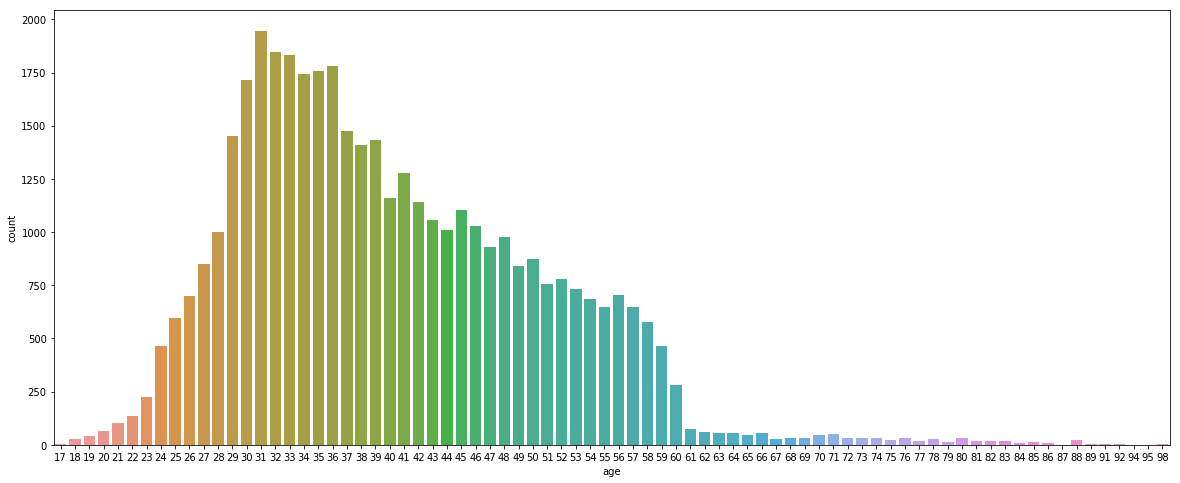

In [23]:
fig,ax=plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x='age',data=bank_client)
ax.set_xlabel('age',fontsize=10)
ax.set_ylabel('count',fontsize=10)
#sns.despine()

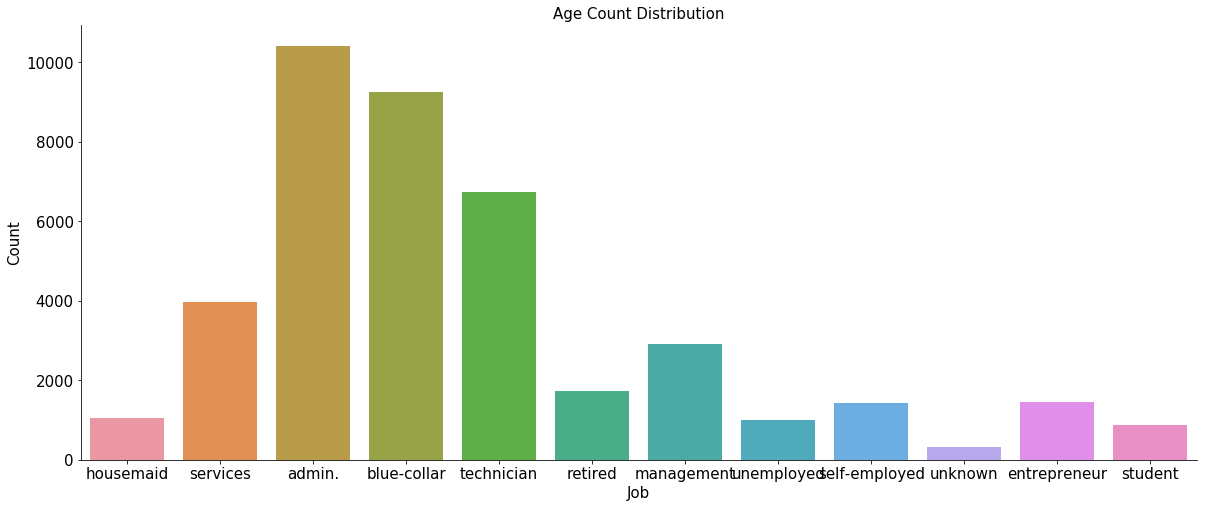

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

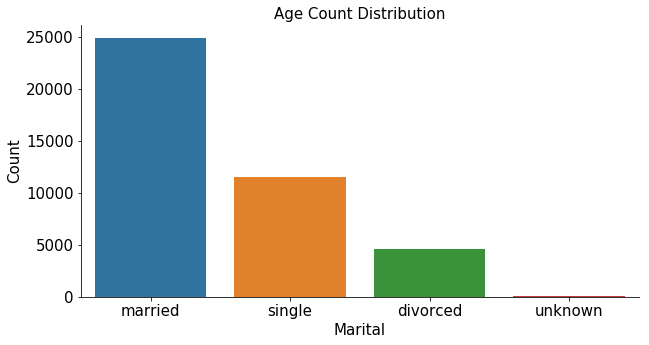

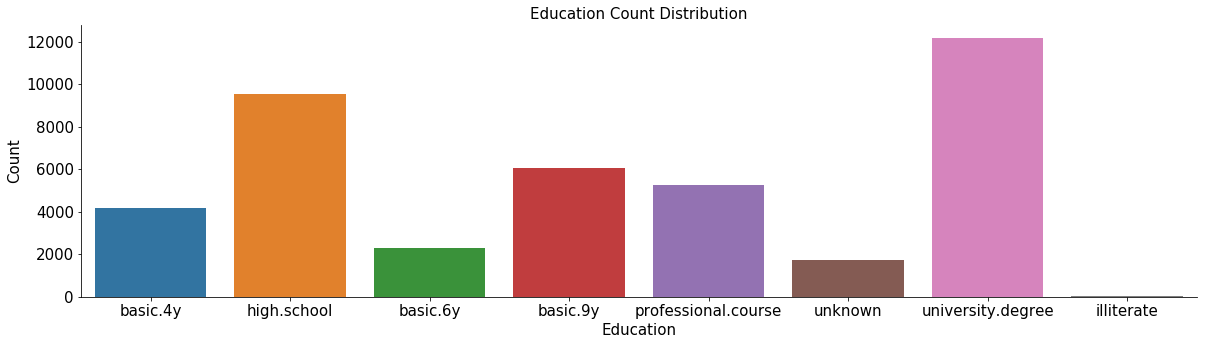

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()




fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


In [27]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())


print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())



Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3
Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576
Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])

bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [30]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [33]:
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client.head()

,age,job,marital,education,default,housing,loan,martial
0,3,3,1,0,0,0,0,1
1,3,7,1,3,1,0,0,1
2,2,7,1,3,0,2,0,1
3,2,0,1,1,0,0,0,1
4,3,7,1,3,0,0,2,1


In [41]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

bank_related.head()



,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [61]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)



bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape



(41188, 20)

In [62]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.25, random_state = 0)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [63]:
X_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
10685,3,1,0,3,0,0,0,1,4,3,5,1.4,94.465,-41.8,4.961,5228.1,2,999,0,1
224,2,9,1,2,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
29638,1,6,2,6,0,2,0,0,0,1,3,-1.8,93.075,-47.1,1.405,5099.1,1,999,0,1
4804,3,9,1,3,1,0,0,1,6,4,1,1.1,93.994,-36.4,4.858,5191.0,1,999,0,1
11614,2,1,2,1,0,0,0,1,4,0,1,1.4,94.465,-41.8,4.959,5228.1,2,999,0,1


In [64]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8920  219]
 [ 702  456]]
91.0


k=1 87.84 (+/- 0.59)
k=2 89.73 (+/- 0.50)
k=3 89.69 (+/- 0.49)
k=4 90.02 (+/- 0.51)
k=5 89.98 (+/- 0.41)
k=6 90.07 (+/- 0.47)
k=7 90.24 (+/- 0.41)
k=8 90.28 (+/- 0.48)
k=9 90.33 (+/- 0.46)
k=10 90.35 (+/- 0.49)
k=11 90.33 (+/- 0.51)
k=12 90.32 (+/- 0.59)
k=13 90.37 (+/- 0.51)
k=14 90.40 (+/- 0.48)
k=15 90.44 (+/- 0.47)
k=16 90.41 (+/- 0.50)
k=17 90.41 (+/- 0.50)
k=18 90.38 (+/- 0.52)
k=19 90.43 (+/- 0.45)
k=20 90.38 (+/- 0.48)
k=21 90.42 (+/- 0.46)
k=22 90.37 (+/- 0.48)
k=23 90.45 (+/- 0.44)
k=24 90.34 (+/- 0.49)
k=25 90.44 (+/- 0.47)
The optimal number of neighbors is 22 with 90.4%


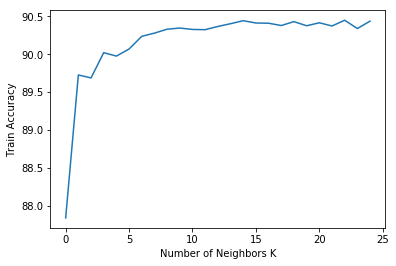

In [66]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

neighbors = np.arange(0,25)


cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8966  173]
 [ 831  327]]
90.0


In [68]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8411  728]
 [ 752  406]]
86.0


In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8795  344]
 [ 589  569]]
91.0


In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[8904  235]
 [ 620  538]]
92.0


In [71]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model',  'XGBoost'],
                'Score':  [RFCCV, SVCCV, KNNCV, LOGCV, XGB]})

models.sort_values(by='Score', ascending=False)

,Models,Score
4,XGBoost,0.911301
3,Logistic Model,0.908388
0,Random Forest Classifier,0.907417
2,K-Near Neighbors,0.903467
1,Support Vector Machine,0.855330


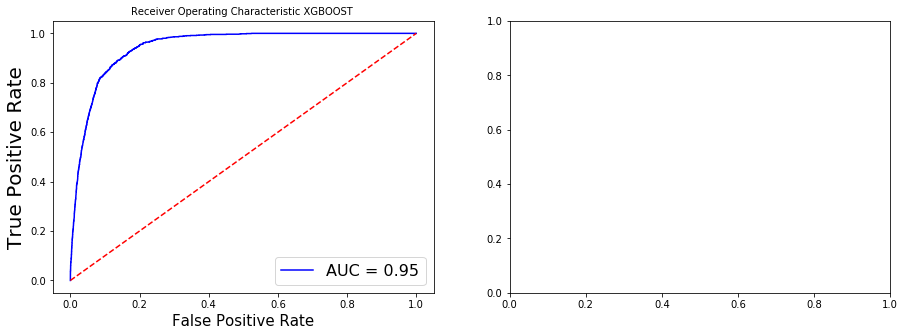

In [79]:
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})




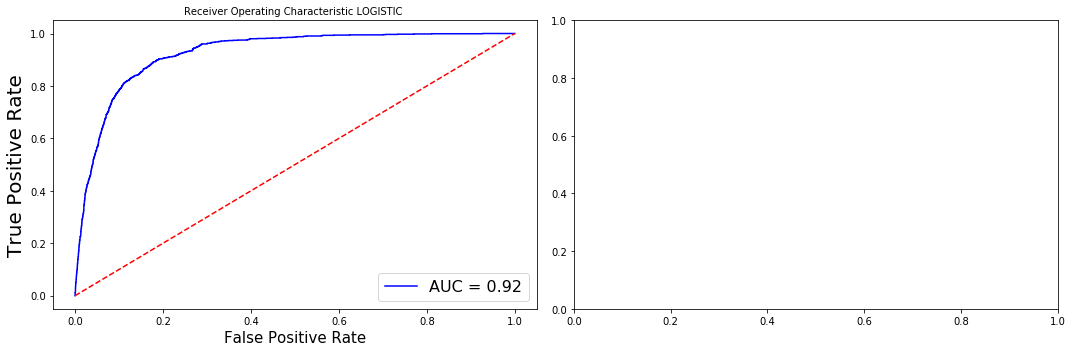

In [89]:
#LOGMODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax.plot(fprlog,tprlog,'b',label= 'AUC = %0.2f' % roc_auclog)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic LOGISTIC ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 




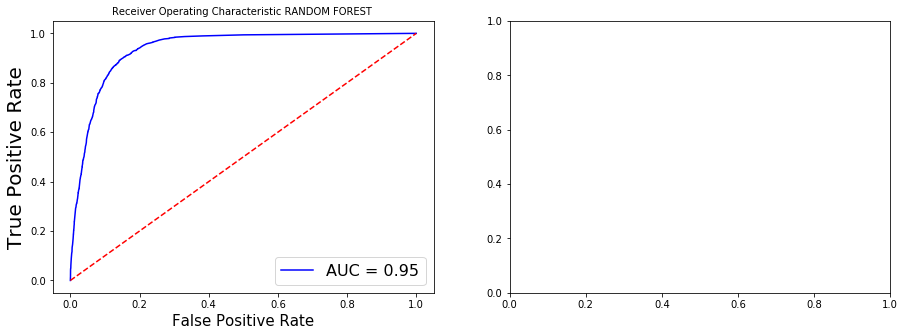

In [96]:
#RANDOM FOREST --------------------
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic RANDOM FOREST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})


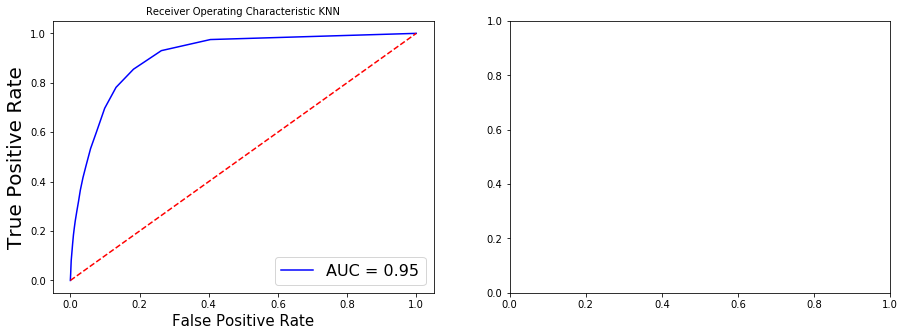

In [97]:
#KNN----------------------
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax.plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic KNN',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})



In [99]:
from sklearn.metrics import classification_report
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9139
           1       0.65      0.28      0.39      1158

   micro avg       0.90      0.90      0.90     10297
   macro avg       0.78      0.63      0.67     10297
weighted avg       0.89      0.90      0.88     10297



In [101]:
print('RANDOM F0REST Reports\n',classification_report(y_test, rfcpred))

RANDOM F0REST Reports
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9139
           1       0.62      0.49      0.55      1158

   micro avg       0.91      0.91      0.91     10297
   macro avg       0.78      0.73      0.75     10297
weighted avg       0.90      0.91      0.90     10297



In [103]:
print('XGB Reports\n',classification_report(y_test, xgbprd))

XGB Reports
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9139
           1       0.70      0.46      0.56      1158

   micro avg       0.92      0.92      0.92     10297
   macro avg       0.82      0.72      0.76     10297
weighted avg       0.91      0.92      0.91     10297

